In [2]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [148]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df1 = pd.read_csv(ruta)
df1

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [149]:
df1.isnull().sum()

ID                      0
fec_not                 0
semana                  0
año                     0
edad_                   0
uni_med_                0
sexo_                   0
cod_pais_o              0
cod_dpto_o              0
cod_mun_o               0
area_                   0
ocupacion_              0
tip_ss_                 0
cod_ase_                9
gp_discapa              0
gp_desplaz              0
gp_migrant              0
gp_carcela              0
gp_gestan               0
gp_calle                0
gp_psiquia              0
gp_vic_vio              0
fecha_contagio          2
inicio_sintomas         2
pac_hos_                0
fec_hos_             1014
condicion_final         0
fecha_defuncion      1262
fecha_nacimiento        0
certif_defuncion     1262
familiar_sintomas       0
fiebre                  0
cefalea                 0
dolor_retroocular       0
mialgias                0
artralgia               0
erupcion                0
dolor_abdomen           0
vomito      

In [177]:
# df1.drop('fecha_defuncion', axis=1, inplace=True)
# df1.drop('certif_defuncion', axis=1, inplace=True)
# df1.drop('fec_hos_', axis=1, inplace=True)
# df1.drop('fecha_contagio', axis=1, inplace=True)
df = df1.drop(columns=['fecha_defuncion', 'certif_defuncion','fec_hos_','fec_not','fecha_contagio','fecha_nacimiento','ID','semana','año','cod_ase_','tip_ss_','inicio_sintomas','conducta'])

In [179]:
# df1.drop('fecha_nacimiento ', axis=1, inplace=True)
# df1.drop('ID', axis=1, inplace=True)

In [180]:
df.isnull().sum()

edad_                0
uni_med_             0
sexo_                0
cod_pais_o           0
cod_dpto_o           0
cod_mun_o            0
area_                0
ocupacion_           0
gp_discapa           0
gp_desplaz           0
gp_migrant           0
gp_carcela           0
gp_gestan            0
gp_calle             0
gp_psiquia           0
gp_vic_vio           0
pac_hos_             0
condicion_final      0
familiar_sintomas    0
fiebre               0
cefalea              0
dolor_retroocular    0
mialgias             0
artralgia            0
erupcion             0
dolor_abdomen        0
vomito               0
diarrea              0
somnolencia          0
hipotension          0
hepatomegalia        0
hemorragia_mucosa    0
hipotermia           0
caida_plaquetas      0
acum_liquido         0
aum_hematocrito      0
latitud              0
longitud             0
dtype: int64

In [181]:
df['sexo_'].replace({'M': 0, 'F': 1}, inplace=True)
print(df1['sexo_'])

0       F
1       M
2       M
3       F
4       F
       ..
1257    F
1258    M
1259    M
1260    F
1261    M
Name: sexo_, Length: 1262, dtype: object


In [182]:
df.dtypes

edad_                  int64
uni_med_               int64
sexo_                  int64
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
pac_hos_               int64
condicion_final        int64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias               int64
artralgia              int64
erupcion               int64
dolor_abdomen          int64
vomito                 int64
diarrea                int64
somnolencia            int64
hipotension            int64
hepatomegalia          int64
hemorragia_mucosa      int64
hipotermia             int64
caida_plaquetas        int64
acum_liquido  

In [187]:
# array = np.concatenate((df.columns.values.reshape(1,-1), df.values), axis=0)
matriz=df.values

In [188]:
# print(array)
print(matriz)

[[ 25.           1.           1.         ...   2.           7.07601118
  -73.10250092]
 [ 24.           1.           0.         ...   2.           7.07949543
  -73.10540009]
 [ 58.           1.           0.         ...   2.           7.09029007
  -73.09100342]
 ...
 [  2.           1.           0.         ...   2.           7.09139061
  -73.10326385]
 [ 12.           1.           1.         ...   2.           7.06108332
  -73.09700012]
 [ 14.           1.           0.         ...   2.           7.06252098
  -73.08044434]]


In [191]:
datos = matriz[:, :].astype(float)
# crear un objeto KMeans y ajustar el modelo a los datos
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(datos)

# obtener las etiquetas de cluster asignadas a cada fila de datos
etiquetas = kmeans.predict(datos)

# agregar las etiquetas de cluster como una nueva columna en la matriz original
array_con_etiquetas = np.concatenate((matriz, etiquetas.reshape(-1,1)), axis=1)

# convertir la matriz con etiquetas de cluster de nuevo a un dataframe
df_con_etiquetas = pd.DataFrame(array_con_etiquetas[1:], columns=array_con_etiquetas[0])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [192]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_con_etiquetas)
scaled_features[:]

array([[-0.31439208, -0.19157791, -0.95881713, ...,  0.17080494,
        -1.26587516, -0.5477609 ],
       [ 1.35053455, -0.19157791, -0.95881713, ...,  1.16793417,
         0.53643582, -0.5477609 ],
       [-0.06954993, -0.19157791,  1.04295175, ..., -0.94326822,
         0.542167  ,  0.98039506],
       ...,
       [-1.39169754, -0.19157791, -0.95881713, ...,  1.26959394,
        -0.99844049, -0.5477609 ],
       [-0.90201324, -0.19157791,  1.04295175, ..., -1.52997027,
        -0.21428766, -0.5477609 ],
       [-0.80407638, -0.19157791, -0.95881713, ..., -1.39716947,
         1.85832108, -0.5477609 ]])

In [193]:
kmeans.inertia_

497210766.6640768

In [194]:
kmeans.cluster_centers_

array([[ 2.85792291e+01,  1.05353319e+00,  4.90364026e-01,
         1.70000000e+02,  6.78158458e+01,  2.74346895e+02,
         1.01927195e+00,  9.85262420e+03,  1.99250535e+00,
         1.99250535e+00,  1.98286938e+00,  1.99785867e+00,
         1.97644540e+00,  1.99892934e+00,  1.99678801e+00,
         1.99143469e+00,  1.75802998e+00,  1.00000000e+00,
         1.90578158e+00,  1.00214133e+00,  1.15845824e+00,
         1.54925054e+00,  1.15845824e+00,  1.30942184e+00,
         1.46573876e+00,  1.82441113e+00,  1.82869379e+00,
         1.88115632e+00,  1.98715203e+00,  1.98929336e+00,
         1.99571734e+00,  1.97323340e+00,  1.99678801e+00,
         1.89614561e+00,  1.98822270e+00,  1.97002141e+00,
         7.07781944e+00, -7.30953329e+01],
       [ 3.37586207e+01,  1.00000000e+00,  4.82758621e-01,
         1.70000000e+02,  6.80000000e+01,  2.71349754e+02,
         1.00492611e+00,  2.94337931e+03,  1.99014778e+00,
         2.00000000e+00,  1.99014778e+00,  2.00000000e+00,
         1.99

In [195]:
kmeans.n_iter_

3

In [196]:
kmeans_kwargs = {
  "init": "k-means++",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_con_etiquetas)
  sse.append(kmeans.inertia_)

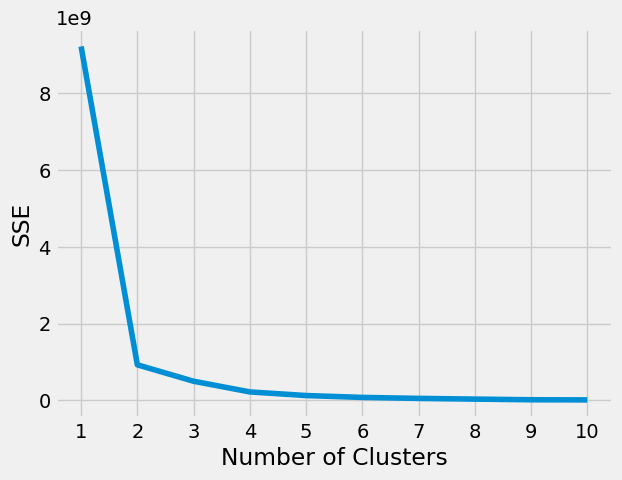

In [197]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [198]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

2

In [199]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluester
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

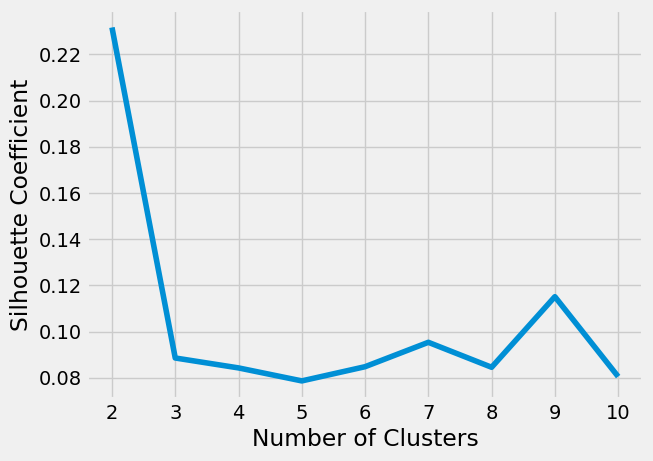

In [200]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()